In [1]:
# Importing all the required packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# After collecting the dataset,the next step is to read the dataset using pd.read_csv function and store it in dataset variable.
dataset = pd.read_csv("dataset_hack4good.csv")
dataset.head()

,States/UTs,District,Constituency,Year,Murder,Culpable Homicide,Rape,Kidnapping & Abduction,Dacoity,Robbery,...,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total crimes against SCs,Voyeurism,Stalking,Abetment of Suicides of Women,Immoral Traffic Prevention Act,Total_Count
0,Andhra Pradesh,Srikakulam,Ichchapuram,2019,37,2,12,20,0,11,...,3,1,0,56,14,0,6,2,0,324
1,Andhra Pradesh,Srikakulam,Palasa,2019,42,6,19,23,3,16,...,4,2,0,68,35,1,9,6,3,401
2,Andhra Pradesh,Srikakulam,Tekkali,2019,13,0,7,5,0,3,...,9,0,1,42,29,4,0,0,1,329
3,Andhra Pradesh,Srikakulam,Pathapatnam,2019,8,1,3,3,0,2,...,2,0,0,15,10,0,0,0,0,99
4,Andhra Pradesh,Srikakulam,Srikakulam,2019,53,8,22,28,4,33,...,11,5,4,77,44,7,11,7,6,593


In [3]:
# The next step is to preprocess the data. Since none of the columns has more than 90% of zeros, we can proceed further.
np.count_nonzero(dataset,axis=0)

array([4127, 4127, 4127, 4127, 4074, 4014, 4087, 4052, 3988, 4024, 4018,
       4039, 3939, 4032, 3923, 3961, 3973, 3877, 3853, 4033, 3861, 3964,
       4052, 3952, 3966, 3888, 3941, 3888, 3852, 4091, 3965, 3907, 3875,
       3897, 3879, 4127], dtype=int64)

In [4]:
dataset.columns

Index(['States/UTs', 'District', 'Constituency', 'Year', 'Murder',
       'Culpable Homicide', 'Rape', 'Kidnapping & Abduction', 'Dacoity',
       'Robbery', 'Criminal Trespass/Burglary', 'Theft', 'Unlawful Assembly',
       'Riots', 'Criminal Breach of Trust', 'Cheating', 'Forgery',
       'Counterfeiting', 'Arson', 'Grievous Hurt', 'Acid attack',
       'Dowry Deaths', 'Sexual Harassment', 'Cruelty',
       'Causing Death by Negligence', 'Extortion', 'Incidence of Rash Driving',
       'HumanTrafficking', 'Unnatural Offence', 'Other IPC crimes',
       'Total crimes against SCs', 'Voyeurism', 'Stalking',
       'Abetment of Suicides of Women', 'Immoral Traffic Prevention Act',
       'Total_Count'],
      dtype='object')

In [5]:
data = dataset

In [6]:
# Finding the average value of the total count column which contains the sum of all the crimes in a constituency.
dataset['Total_Count'].mean()

731.8158468621275

In [7]:
# Finding the median value of the total count column.
dataset['Total_Count'].median()

739.0

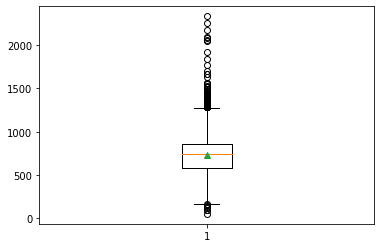

In [8]:
# With the help of the boxplot graph, we can find the values of 25%,75%,outliers,etc.
plt.boxplot(dataset['Total_Count'],showmeans=True);

In [9]:
# Defining a function that classifies the total crime count into 3 categories namely "High crime prone area"
# (total_count value>=800), "Moderate crime prone area" (total_count value in the range of 351-799) and "Less crime prone area"
# (total_count value<=350).
def fun(val):
    if val>=800:
        val = "High Crime Prone Area"
    elif val<=350:
        val="Less Crime Prone Area"
    else:
        val="Moderate Crime Prone Area"
    return val

In [10]:
dataset['Result_Threshold'] = dataset['Total_Count'].apply(fun)

In [11]:
dataset.head()

,States/UTs,District,Constituency,Year,Murder,Culpable Homicide,Rape,Kidnapping & Abduction,Dacoity,Robbery,...,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total crimes against SCs,Voyeurism,Stalking,Abetment of Suicides of Women,Immoral Traffic Prevention Act,Total_Count,Result_Threshold
0,Andhra Pradesh,Srikakulam,Ichchapuram,2019,37,2,12,20,0,11,...,1,0,56,14,0,6,2,0,324,Less Crime Prone Area
1,Andhra Pradesh,Srikakulam,Palasa,2019,42,6,19,23,3,16,...,2,0,68,35,1,9,6,3,401,Moderate Crime Prone Area
2,Andhra Pradesh,Srikakulam,Tekkali,2019,13,0,7,5,0,3,...,0,1,42,29,4,0,0,1,329,Less Crime Prone Area
3,Andhra Pradesh,Srikakulam,Pathapatnam,2019,8,1,3,3,0,2,...,0,0,15,10,0,0,0,0,99,Less Crime Prone Area
4,Andhra Pradesh,Srikakulam,Srikakulam,2019,53,8,22,28,4,33,...,5,4,77,44,7,11,7,6,593,Moderate Crime Prone Area


In [12]:
# Using LabelEncoder function, all the string variables are converted into numbers so that the ML model can process it.
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
data['States/UTs'] = lab_enc.fit_transform(dataset['States/UTs'])
data['District'] = lab_enc.fit_transform(dataset['District'])
data['Constituency'] = lab_enc.fit_transform(dataset['Constituency'])

In [13]:
data.head(3)

,States/UTs,District,Constituency,Year,Murder,Culpable Homicide,Rape,Kidnapping & Abduction,Dacoity,Robbery,...,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total crimes against SCs,Voyeurism,Stalking,Abetment of Suicides of Women,Immoral Traffic Prevention Act,Total_Count,Result_Threshold
0,1,638,1436,2019,37,2,12,20,0,11,...,1,0,56,14,0,6,2,0,324,Less Crime Prone Area
1,1,638,2759,2019,42,6,19,23,3,16,...,2,0,68,35,1,9,6,3,401,Moderate Crime Prone Area
2,1,638,3656,2019,13,0,7,5,0,3,...,0,1,42,29,4,0,0,1,329,Less Crime Prone Area


In [14]:
# Splitting the dataset into dependent varibale(Y) and independent variable(X).
X = data.drop(columns=['Year','Total_Count','Result_Threshold'])
Y = data['Result_Threshold']

In [15]:
# The independent variables are normalized using StandardScaler function.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [16]:
# With the help of sklearn library, the dataset is divided into train data and test data.
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,Y,test_size=0.3,random_state=42)

In [17]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2888, 34) (1239, 34) (2888,) (1239,)


### The next step is to choose the best ML model as per the problem statement. As our problem statement comes under classification supervised learning, we can use various classification algorithms such as 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes'.

# Logistic Regression

In [18]:
# Importing the Logistic Regression ML model and some of the parameters of the model are changed depending upon the accuracy.
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight='balanced',max_iter=1200)

In [19]:
classifier.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1200)

In [20]:
predicted_values = classifier.predict(x_test)

In [21]:
# Displaying the predicted output for the first 10 rows of the test data.
predicted_values[0:11]

array(['High Crime Prone Area', 'Moderate Crime Prone Area',
       'High Crime Prone Area', 'Moderate Crime Prone Area',
       'Moderate Crime Prone Area', 'Moderate Crime Prone Area',
       'Moderate Crime Prone Area', 'Moderate Crime Prone Area',
       'High Crime Prone Area', 'Moderate Crime Prone Area',
       'Moderate Crime Prone Area'], dtype=object)

In [22]:
# Displaying the original output for the first 10 rows of the test data. We can observe that some of the values are wrong.
print(list(y_test[0:11]))

['Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'High Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'High Crime Prone Area', 'Moderate Crime Prone Area']


In [23]:
# The final accuracy of the model can be obtained using sklearn library and it came around 82.2%.
accuracy_score(predicted_values,y_test)

0.8224374495560937

# Decision Tree

In [24]:
# The next algorithm is Decision Tree and the model is imported. 
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(criterion='entropy', class_weight='balanced', min_samples_split=3, min_samples_leaf=3, max_depth=3000)

In [25]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3000, min_samples_leaf=3, min_samples_split=3)

In [26]:
predicted_values = classifier.predict(x_test)

In [27]:
# Classification report for Train Data. This shows how good the model is trained with the training data.

predicted_values = classifier.predict(x_train)
print(classification_report(y_train, predicted_values))

                           precision    recall  f1-score   support

    High Crime Prone Area       0.95      0.98      0.96       989
    Less Crime Prone Area       0.92      1.00      0.96       218
Moderate Crime Prone Area       0.99      0.96      0.97      1681

                 accuracy                           0.97      2888
                macro avg       0.95      0.98      0.96      2888
             weighted avg       0.97      0.97      0.97      2888



In [28]:
# Classification report for Test Data. This shows the test accuracy of the model when tested with the test data.

predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

                           precision    recall  f1-score   support

    High Crime Prone Area       0.70      0.69      0.69       446
    Less Crime Prone Area       0.71      0.87      0.78        82
Moderate Crime Prone Area       0.79      0.78      0.78       711

                 accuracy                           0.75      1239
                macro avg       0.73      0.78      0.75      1239
             weighted avg       0.75      0.75      0.75      1239



In [29]:
# The accuracy of the Decision Tree model came around 75% which was poor when compared with the Logistic Regression model.
accuracy_score(predicted_values,y_test)

0.7506053268765133

# Random Forest

In [30]:
# Random Forest model is imported and some of the parameters are pruned.
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC(class_weight='balanced',n_estimators=150,criterion='entropy',min_samples_split=3,min_samples_leaf=3)

In [31]:
classifier.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=150)

In [32]:
# Classification report for Train Data. We can observe that the model overfit the train data.

predicted_values = classifier.predict(x_train)
print(classification_report(y_train, predicted_values))

                           precision    recall  f1-score   support

    High Crime Prone Area       1.00      1.00      1.00       989
    Less Crime Prone Area       1.00      1.00      1.00       218
Moderate Crime Prone Area       1.00      1.00      1.00      1681

                 accuracy                           1.00      2888
                macro avg       1.00      1.00      1.00      2888
             weighted avg       1.00      1.00      1.00      2888



In [33]:
# Classification report for Test Data. 

predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

                           precision    recall  f1-score   support

    High Crime Prone Area       0.93      0.83      0.88       446
    Less Crime Prone Area       0.94      0.88      0.91        82
Moderate Crime Prone Area       0.89      0.95      0.92       711

                 accuracy                           0.90      1239
                macro avg       0.92      0.89      0.90      1239
             weighted avg       0.91      0.90      0.90      1239



In [34]:
# The accuracy of the Random Forest model came around 90.3% which is good compared to the Logistic Regression model.
accuracy_score(predicted_values,y_test)

0.9031476997578692

# KNN

In [35]:
# The next algorithm is KNN model.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7,weights='uniform',p=1,algorithm='auto')

In [36]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [37]:
predicted_values = knn.predict(x_test)

In [38]:
# The accuracy of the KNN model came around 74%.
accuracy_score(predicted_values,y_test)

0.7401129943502824

# Support Vector Machine

In [39]:
# The next model is Support Vector Machine and the model is imported from the corresponding library.
from sklearn.svm import SVC
classifier = SVC(kernel='linear',class_weight='balanced')

In [40]:
classifier.fit(x_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [41]:
predicted_values = classifier.predict(x_test)

In [42]:
predicted_values = classifier.predict(x_test)

In [43]:
# The accuracy of the SVM model came around 98.7% which is the best compared to the previous model.
accuracy_score(predicted_values,y_test)

0.9870863599677159

In [44]:
# The predicted output of the first 10 rows are displayed.
predicted_values[0:11]

array(['Moderate Crime Prone Area', 'Moderate Crime Prone Area',
       'High Crime Prone Area', 'Moderate Crime Prone Area',
       'Moderate Crime Prone Area', 'Moderate Crime Prone Area',
       'Moderate Crime Prone Area', 'Moderate Crime Prone Area',
       'Moderate Crime Prone Area', 'High Crime Prone Area',
       'Moderate Crime Prone Area'], dtype=object)

In [45]:
# The actual output of the first 10 rows are displayed. We can observe that almost all the values are correct.
print(list(y_test[0:11]))

['Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'High Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'Moderate Crime Prone Area', 'High Crime Prone Area', 'Moderate Crime Prone Area']


# Naive Bayes

In [46]:
# The next algorithm is Naive Bayes model.
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [47]:
predicted_values = classifier.predict(x_test)

In [48]:
# The accuracy of the Naive Bayes model came around 80.7%.
accuracy_score(predicted_values,y_test)

0.8071025020177562

# INFERENCE
## Support Vector Machine = 98.7%
## Random Forest = 90.3%
## Logistic Regression = 82.2%
## Naive Bayes = 80.7%
## Decision Tree = 75%
## KNN = 74% 